# Within-session Analysis of Neuropixel Data

In [107]:
import os
from pathlib import Path

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# Show all columns when printing data
pd.set_option('display.max_columns', None)

## 1. Loading a session data

In [2]:
# Specify home path and a .json file
# HOME = Path().cwd()
HOME = Path('/media/internal/data/neuropixel')
manifest_path = HOME / 'data' / 'Ecephy' / "manifest.json"

In [3]:
# Project-level object that fetches from Allen's public API (warehouse)
# uses .json file to point to a cache directory
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
table = cache.get_session_table()
table.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [7]:
# Find unique session IDs
session_ids = np.unique(table.index)
session_ids

array([715093703, 719161530, 721123822, 732592105, 737581020, 739448407,
       742951821, 743475441, 744228101, 746083955, 750332458, 750749662,
       751348571, 754312389, 754829445, 755434585, 756029989, 757216464,
       757970808, 758798717, 759883607, 760345702, 760693773, 761418226,
       762120172, 762602078, 763673393, 766640955, 767871931, 768515987,
       771160300, 771990200, 773418906, 774875821, 778240327, 778998620,
       779839471, 781842082, 786091066, 787025148, 789848216, 791319847,
       793224716, 794812542, 797828357, 798911424, 799864342, 816200189,
       819186360, 819701982, 821695405, 829720705, 831882777, 835479236,
       839068429, 839557629, 840012044, 847657808])

In [8]:
# How many sessions are there? 
session_ids.shape[0]

58

In [9]:
# Load a session
session = cache.get_session_data(session_ids[11])

Downloading:   0%|          | 0.00/2.82G [00:00<?, ?B/s]

In [10]:
session.metadata

{'specimen_name': 'C57BL/6J-412792',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'wt/wt',
 'sex': 'M',
 'age_in_days': 92.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 761,
 'num_channels': 2223,
 'num_probes': 6,
 'num_stimulus_presentations': 70390,
 'session_start_time': datetime.datetime(2018, 10, 26, 12, 58, 51, tzinfo=tzoffset(None, -25200)),
 'ecephys_session_id': 750749662,
 'structure_acronyms': ['VISpm',
  nan,
  'PO',
  'LD',
  'LP',
  'DG',
  'CA1',
  'LGd',
  'CA3',
  'VISrl',
  'Eth',
  'VISam',
  'VISp',
  'LGv',
  'IGL',
  'VISl',
  'VISal',
  'VPM',
  'TH',
  'CA2'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes']}

In [52]:
session.structurewise_unit_counts

LP       142
CA1      113
LGd       82
VISam     64
VISpm     64
VPM       55
VISp      52
VISal     46
VISrl     41
PO        30
DG        26
VISl      20
TH        13
CA3       10
Eth        2
LD         1
Name: ecephys_structure_acronym, dtype: int64

## 2. Select stimuli and region

Let's just work with **Drifting Gratings** and **V1**.

In [58]:
session.stimulus_presentations

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,24.266019,null,spontaneous,84.332759,null,null,null,60.066740,0
1,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.332759,0.0,gabors,84.566284,4.0,20.0,-10.0,0.233525,1
2,null,0.8,null,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.566284,0.0,gabors,84.816490,4.0,-10.0,40.0,0.250206,2
3,null,0.8,null,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.816490,0.0,gabors,85.066696,4.0,30.0,-30.0,0.250206,3
4,null,0.8,null,90.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.066696,0.0,gabors,85.316902,4.0,-20.0,-30.0,0.250206,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70385,null,0.8,null,60.0,0.75,"[250.0, 250.0]",0.04,9150.657391,14.0,static_gratings,9150.907602,null,null,null,0.250211,4868
70386,null,0.8,null,90.0,0.5,"[250.0, 250.0]",0.02,9150.907602,14.0,static_gratings,9151.157809,null,null,null,0.250207,4891
70387,null,0.8,null,90.0,0.0,"[250.0, 250.0]",0.32,9151.157809,14.0,static_gratings,9151.408015,null,null,null,0.250207,4899


In [60]:
stim_type = 'drifting_gratings'
roi = 'VISp'

# get just one stimulus condition, can look up later what its parameters are 
stim_id = session.stimulus_conditions.loc[session.stimulus_conditions.stimulus_name == stim_type].index.values[0]
stim_idx = session.stimulus_presentations.loc[session.stimulus_presentations.stimulus_condition_id == stim_id].index.values

roi_idx = session.units[session.units.ecephys_structure_acronym == roi].index.values

In [54]:
# Sanity check
session.units.loc[roi_idx, :].shape

(52, 89)

In [55]:
stim_id

246

In [61]:
session.stimulus_presentations.loc[stim_idx, :]

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3798,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,1585.570019,2.0,drifting_gratings,1587.571669,2.0,null,null,2.00165,246
3810,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,1621.600109,2.0,drifting_gratings,1623.601799,2.0,null,null,2.00169,246
3828,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,1675.645229,2.0,drifting_gratings,1677.646929,2.0,null,null,2.00170,246
3904,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,1903.835839,2.0,drifting_gratings,1905.837529,2.0,null,null,2.00169,246
3983,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,2141.033992,2.0,drifting_gratings,2143.035672,2.0,null,null,2.00168,246
31029,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,3260.969519,5.0,drifting_gratings,3262.971159,2.0,null,null,2.00164,246
31115,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,3519.185179,5.0,drifting_gratings,3521.186869,2.0,null,null,2.00169,246
31160,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,3654.298062,5.0,drifting_gratings,3656.299752,2.0,null,null,2.00169,246
49225,null,0.8,null,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,4774.233789,7.0,drifting_gratings,4776.235479,2.0,null,null,2.00169,246


## 3. Get spike counts and visualize

In [62]:
time_step = 0.03
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

In [63]:
spike_cnts = session.presentationwise_spike_counts(
    stimulus_presentation_ids=stim_idx,  
    unit_ids=roi_idx,
    bin_edges=time_bins
)

In [64]:
spike_cnts.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3798 ... 49422
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.085 ... 0.485
  * unit_id                          (unit_id) int64 951877136 ... 951878911

/home/devxl/miniconda3/envs/neuro/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


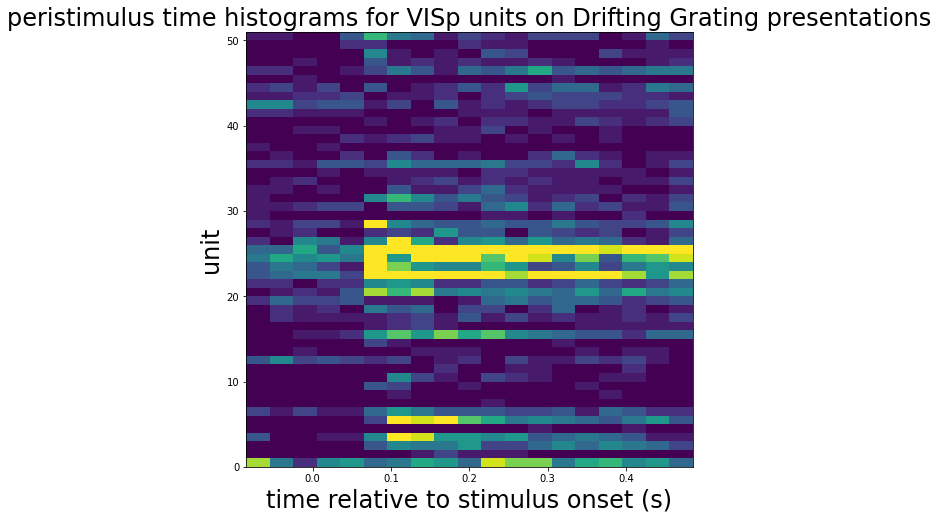

In [69]:
mean_histograms = spike_cnts.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on Drifting Grating presentations", fontsize=24)

plt.show()

In [68]:
spikes = session.conditionwise_spike_statistics(
    stimulus_presentation_ids=stim_idx,
    unit_ids=roi_idx
)

# display the parameters associated with each condition
spikes = pd.merge(spikes, session.stimulus_conditions, left_on="stimulus_condition_id", right_index=True)

spikes.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
unit_id,stimulus_condition_id,,,,,,,,,,,,,,,,,,,,
951877136,246,626,15,41.733333,26.195601,6.763675,null,0.8,null,None,1.0,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,drifting_gratings,2.0,deg,null,null,"[1.0, 1.0, 1.0]"
951877196,246,34,15,2.266667,7.146095,1.845114,null,0.8,null,None,1.0,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,drifting_gratings,2.0,deg,null,null,"[1.0, 1.0, 1.0]"
951877260,246,366,15,24.400000,13.684193,3.533243,null,0.8,null,None,1.0,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,drifting_gratings,2.0,deg,null,null,"[1.0, 1.0, 1.0]"
951877272,246,326,15,21.733333,11.404677,2.944675,null,0.8,null,None,1.0,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,drifting_gratings,2.0,deg,null,null,"[1.0, 1.0, 1.0]"
951877312,246,19,15,1.266667,2.051712,0.529750,null,0.8,null,None,1.0,135.0,"[21235.93333333, 21235.93333333]","[250.0, 250.0]",0.04,drifting_gratings,2.0,deg,null,null,"[1.0, 1.0, 1.0]"


In [72]:
all_spikes = session.presentationwise_spike_times(
    stimulus_presentation_ids=stim_idx,  
    unit_ids=roi_idx,
)

In [94]:
all_spikes.reset_index(inplace=True)

In [97]:
spikes_grpd = all_spikes.groupby(["stimulus_presentation_id", "unit_id"], as_index=False)["spike_time"].count()

In [98]:
spikes_grpd[spikes_grpd.unit_id == 951877136]

,stimulus_presentation_id,unit_id,spike_time
0,3798,951877136,94
47,3810,951877136,13
85,3828,951877136,12
125,3904,951877136,20
167,3983,951877136,11
209,31029,951877136,50
255,31115,951877136,66
300,31160,951877136,53
341,49225,951877136,66
386,49265,951877136,75


In [ ]:
units = spikes_grpd.unit_id.unique()

fig, axes = plt.subplots(nrows=len(units), ncols=1, figsize=(8, 200)) 

for i, u in enumerate(units):
    
    # select data
    _df = spikes_grpd.loc[spikes_grpd.unit_id == u]
    
    # plot
    axes[i].plot(_df.stimulus_presentation_id, _df.spike_time)
    axes[i].set_title(f"Unit #{u}")

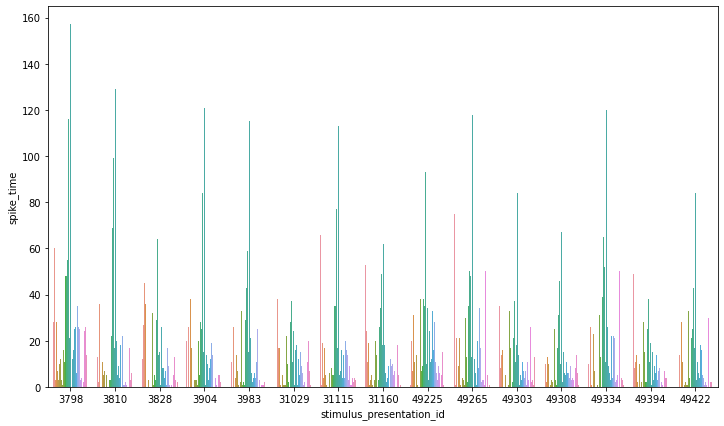

In [112]:
fig, ax = plt.subplots(figsize=(12, 7))
plot = sns.barplot(x='stimulus_presentation_id', y='spike_time', hue='unit_id', ax=ax, data=spikes_grpd)
plot.legend_.remove()